# Datos

##### Javier Valle, Carnet 20159, Sección 20

In [1]:
# Imports necesarios.
import numpy as np

### Task 1.1: Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

In [2]:
# Cargando la data a un array de numpy.

# Abriendo el csv y cargando los datos a un array.
data = np.genfromtxt('data.csv', delimiter=',')

# Imprimiendo la data.
#print(data)

# Cargando los datos a un np.array.
data = np.array(data)

#data


# Columna de precios.

# Imprimiendo los datos de la segunda columna.
data[:,2] # Columna de precios.

# Quitando los NaN de la segunda columna.
data = data[~np.isnan(data[:,2])]

data[:,2] # Columna de precios sin el NaN.

# Columna de sqft_living.

data[:,5] # Columna de sqft_living.

# Quitando los NaN de la quinta columna.
data = data[~np.isnan(data[:,5])]

data[:,5] # Columna de sqft_living sin el NaN.


array([1180., 2570.,  770., ..., 1020., 1600., 1020.])

# Task 1.2: Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[9.70690688e-01]
 [5.66190228e+06]]
xmr:  [[1.0000e+00 0.0000e+00]
 [1.0000e+00 2.1613e+04]]
xm:  [[    0]
 [21613]]
tf:  [[  0.97069069]
 [261.96739489]]


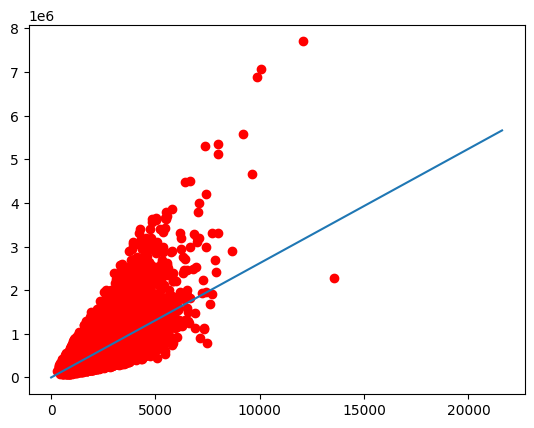

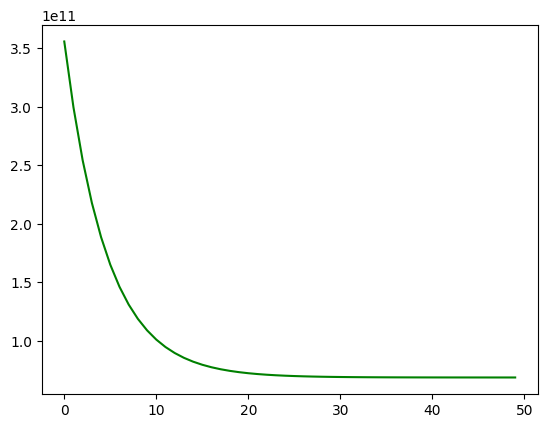

In [3]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000001,
    n=50
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))


ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Task 1.3: Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[-3.57729757e+04]
 [-7.73198792e+08]]
xmr:  [[1.0000e+00 0.0000e+00]
 [1.0000e+00 2.1613e+04]]
xm:  [[    0]
 [21613]]
tf:  [[-35772.97571208]
 [-35773.05412413]]


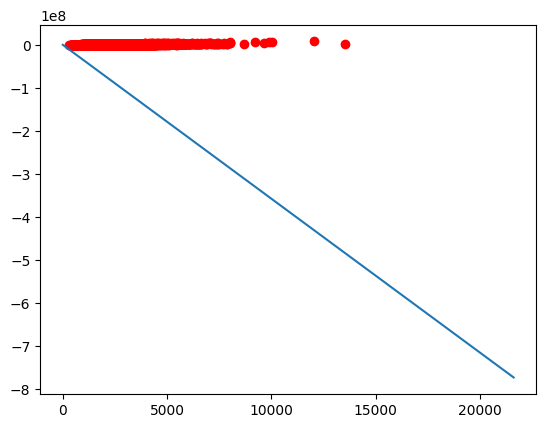

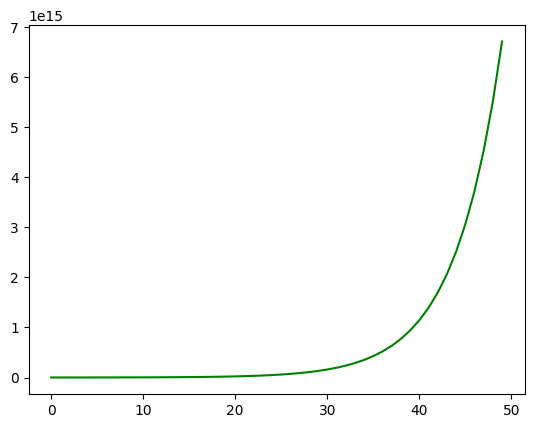

In [4]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linregv as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regressionv(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000001,
    n=50
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))


ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Task 1.4: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

# Polinomio de grado 1.

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[9.27278544e-01]
 [2.48947996e+04]]
xmr:  [[1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.1613e+04 2.1613e+04]]
xm:  [[    0]
 [21613]]
tf:  [[0.92727854]
 [0.58352949]
 [0.56827139]]


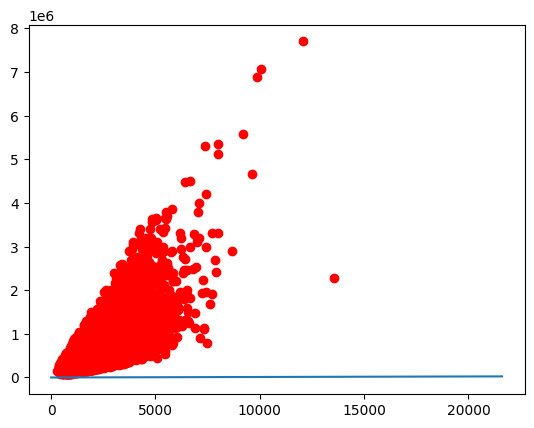

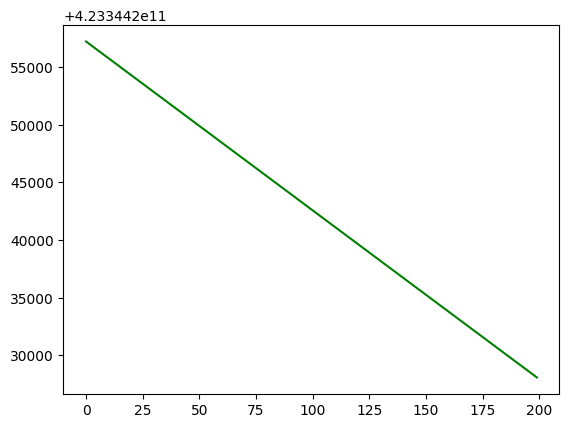

In [23]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))


# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 1
))


# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000001,
    n=200
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 1
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 2

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[6.01649454e-02]
 [3.52699404e+07]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 4.67121769e+08]]
xm:  [[    0]
 [21613]]
tf:  [[0.06016495]
 [0.85605589]
 [0.0754652 ]]


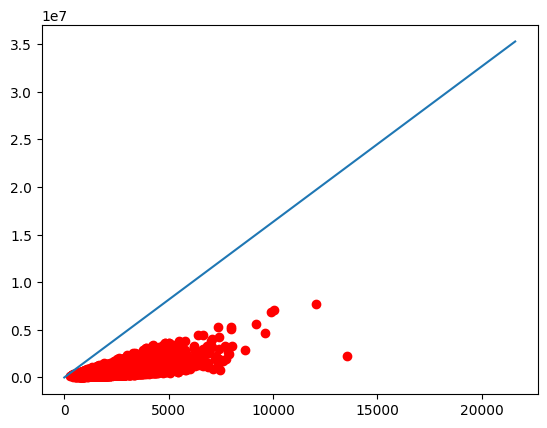

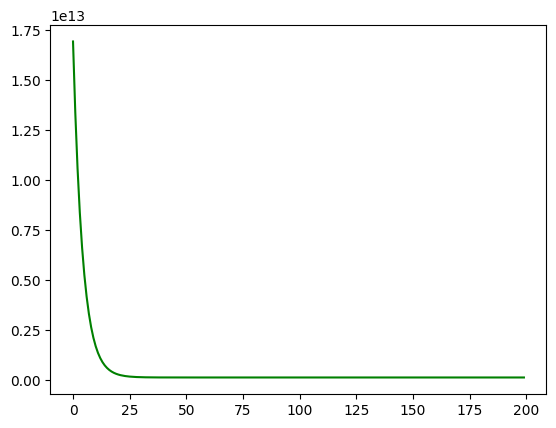

In [28]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))


# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 2
))


# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.000000000000001,
    n=200
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 2
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 3

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[1.97759859e+69]
 [2.00695093e+93]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 1.00959028e+13]]
xm:  [[    0]
 [21613]]
tf:  [[1.97759859e+69]
 [7.18519228e+72]
 [1.98788654e+80]]


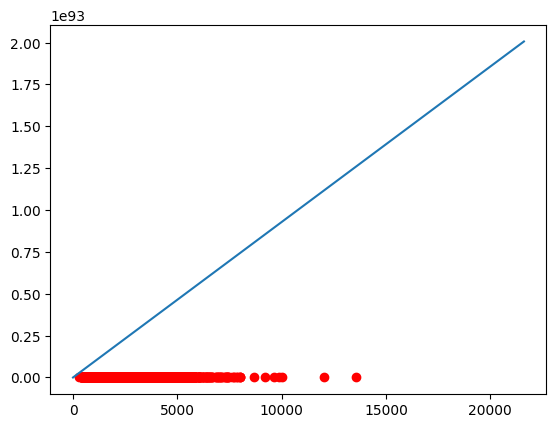

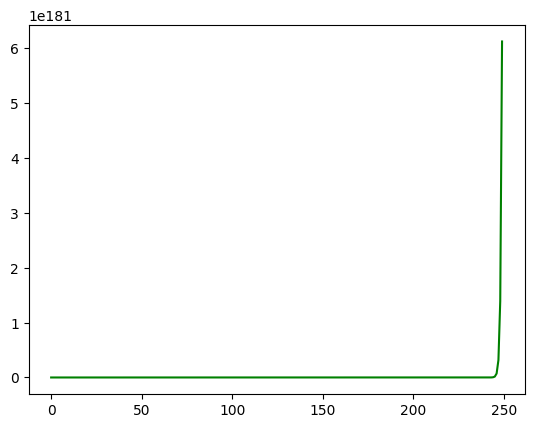

In [38]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))


# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 3
))


# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.000000000000000000001,
    n=250
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 3
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 4

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[1.46499766e-01]
 [1.55191910e+08]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 2.18202747e+17]]
xm:  [[    0]
 [21613]]
tf:  [[1.46499766e-01]
 [2.53858639e-01]
 [7.11202884e-10]]


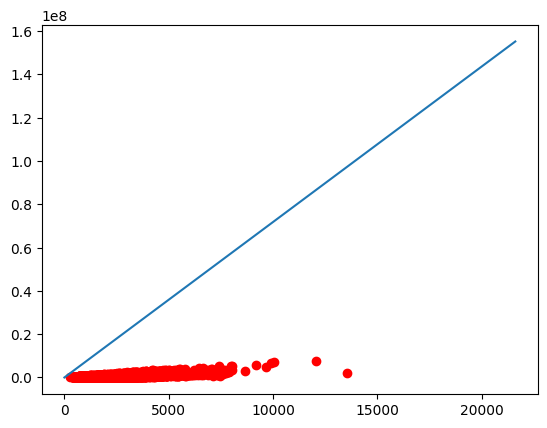

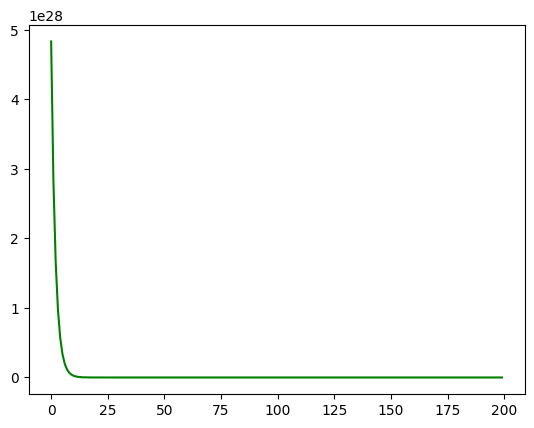

In [52]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))


# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 4
))


# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.000000000000000000000000000001,
    n=200
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 4
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 5

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[1.92115242e-01]
 [1.67327909e+08]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 4.71601597e+21]]
xm:  [[    0]
 [21613]]
tf:  [[1.92115242e-01]
 [6.59638394e-01]
 [3.54777536e-14]]


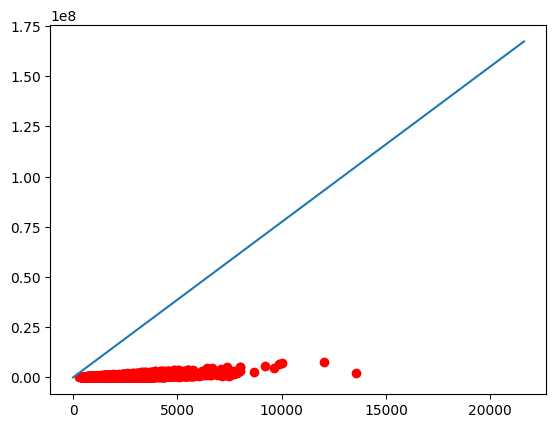

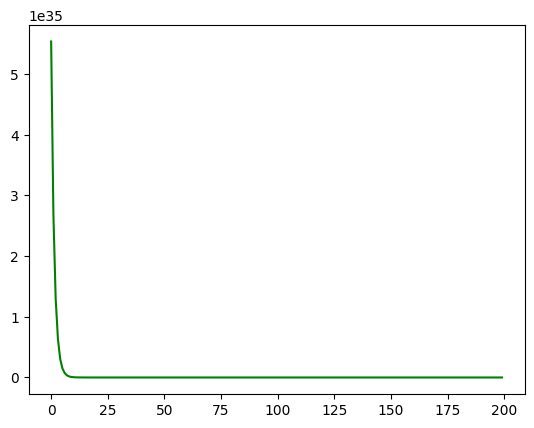

In [65]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))


# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 5
))


# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000000000000000000000000001,
    n=200
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 5
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 6

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[9.03193245e-01]
 [3.86826026e+25]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 1.01927253e+26]]
xm:  [[    0]
 [21613]]
tf:  [[0.90319325]
 [0.87738192]
 [0.37951187]]


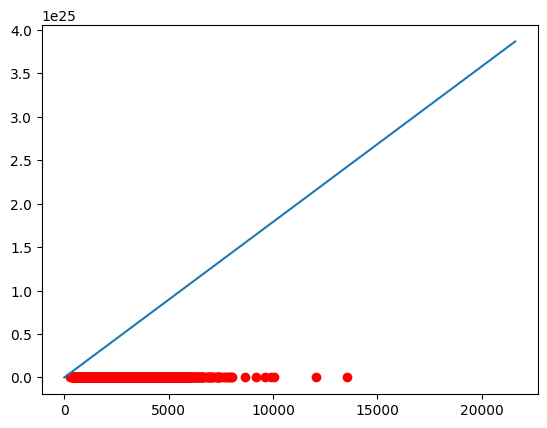

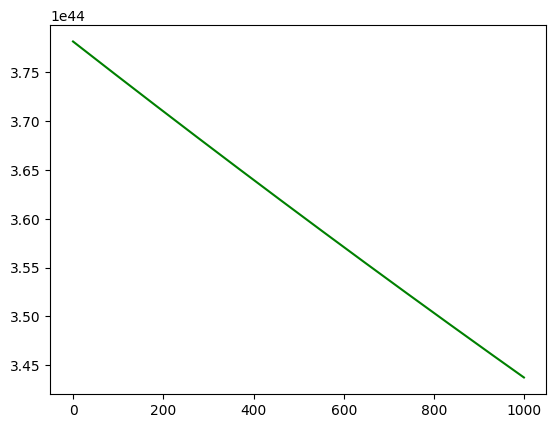

In [83]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
import quad as q
import linreg as l

# Manipulando los datos.

# Precios.
X = data[:,5]

# Sqft_living.
y = data[:,2]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))


# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 6
))


# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000000000000000000000000000000000000001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 6
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()